# Importing the Data and The Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import decomposition
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.decomposition import TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA, PCA

df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.



## Dropping all the libraires and selecting only rows that start after the 2010

In [2]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection","Hmax","QC_Flag"],inplace = True, axis = 1)
df = df.iloc[331371:]
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
# df.station_id.nunique()

In [3]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
df = df.drop(["time"], axis = 1)
# df.station_id.unique()

In [4]:
df = df.replace({ 'station_id': buoy_ident})
df = df.dropna(axis = 1, how='all')
df.reset_index(inplace = True)
df.dropna(inplace = True, how = 'all')
df.head()

,index,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,331371,1,1007.2,50,17,25,5.5,-1.1,10.3,62
1,331372,5,1015.8,20,18,33,7,0.9,11.4,65
2,331373,4,1006.2,NaN,NaN,NaN,5.3,1.7,10.6,78
3,331374,3,1011.2,10,12,20,4.7,1.1,10.2,78
4,331375,2,1009.4,30,17,25,5.7,-1.2,10.4,61


In [5]:
df = df.apply(pd.to_numeric)
df = df.dropna()
df.drop('index', axis = 1, inplace = True)
df_vis = df.copy()
df_vis = df_vis.apply(pd.to_numeric)

# Selecting only the top 2 most correlated with the Dependent Variable

In [6]:
df = df[['AirTemperature','SeaTemperature','DewPoint','RelativeHumidity']]
df.head()
# df.reset_index(inplace= True)
# df.isna()
# drop('index',axis = 1, inplace = True)

,AirTemperature,SeaTemperature,DewPoint,RelativeHumidity
0,5.5,10.3,-1.1,62.0
1,7.0,11.4,0.9,65.0
3,4.7,10.2,1.1,78.0
4,5.7,10.4,-1.2,61.0
5,5.3,10.4,-0.3,67.0


In [7]:
df.shape

(85534, 4)

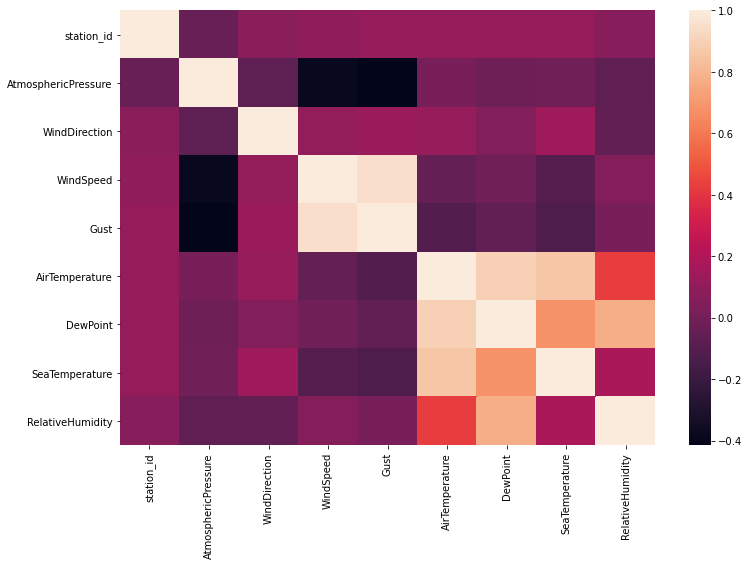

station_id                1.449720
AtmosphericPressure     149.111653
WindDirection          7920.609247
WindSpeed                45.905410
Gust                     87.807038
AirTemperature            8.089225
DewPoint                 16.070438
SeaTemperature            4.397008
RelativeHumidity        110.264262
dtype: float64

In [8]:
# df_vis['RelativeHumidity_labels'] = df_vis['RelativeHumidity'].apply(lambda value:'low' 
#                                                                       if value <= 70 else 'medium'
#                                                                               if value < 90 else 'high')

# from sklearn.preprocessing import OrdinalEncoder

# ord_enc = OrdinalEncoder()

# df_vis['RelativeHumidity_labels'] = ord_enc.fit_transform(np.reshape(df_vis['RelativeHumidity_labels'].values, (1,-1) ))

# df_vis['RelativeHumidity_labels'] = pd.Categorical(df_vis['RelativeHumidity_labels'], 
#                                            categories=['low', 'medium', 'high'])

# df_vis.head()



fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df_vis.corr(), ax = ax)
plt.show()


df_vis.corr()
df_vis.var()

In [9]:
# df_var = df_vis.describe().T
# df_var  = df_var.reset_index().rename(columns = {'index' : 'columns'})

# df_var['column_var'] = df_var['columns'].apply(lambda x : np.var(df_vis[x]))
# df_var['target_corr'] = df_var['columns'].apply(lambda x : np.corrcoef(df_vis['RelativeHumidity'], df_vis[x])[0][1])


# df_var = df_var.sort_values('column_var', ascending = True)
# df_var['column_var'] = (df_var['column_var'] - df_var['column_var'].min()) / (df_var['column_var'].max() - df_var['column_var'].min())
# trace1 = go.Scatter(x=df_var['columns'], y=df_var['column_var'], opacity=0.75, marker=dict(color="red"))
# layout = dict(height=400, title='Feature Variance', legend=dict(orientation="h"));
# fig = go.Figure(data=[trace1], layout=layout);
# iplot(fig);

# df_var

# trace1 = go.Histogram(x=df_var['target_corr'], opacity=0.45, marker=dict(color="green"))
# layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
# fig = go.Figure(data=[trace1], layout=layout);
# iplot(fig);

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1].values, test_size=0.2)
print(X_train1.shape)

class CustomScaler():
    
        def __init__(self, X_Scale, y_Scale ) :
        
            self.X_Scale =   X_Scale 
            self.y_Scale =   y_Scale
            
            self.x_num =     [np.min(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_maxs =    [np.max(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_mins =    [np.min(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            
            self.y_num =     np.mean(self.y_Scale)
            self.y_max_min = np.min(self.y_Scale) - np.min(self.y_Scale)

        def scaleX(self, x_value):
            x = x_value.copy()
            for i in range(x.shape[1]):
                
                x[:,i]= (x[:,i] - self.x_num[i])/(self.x_maxs[i]-self.x_mins[i])
            return x

        def inverseScaleX(self, x_value):
            x = x_value.copy()
            
            for i in range(x.shape[1]):
                x[:,i]= (x[:,i] * (self.x_maxs[i]-self.x_mins[i])) + self.x_num[i]
            return x



        

        def scaleY(self, y_value):
            y = y_value.copy()
            ys = (y - self.y_num)/(self.y_max_min)
            return ys

        def inverseScaleY(self, y_value):
            y = y_value.copy()
            ys = (y * self.y_max_min) + self.y_num
            return ys


        



custom_scaler = CustomScaler(X_train1,y_train1)
    
X_train = custom_scaler.scaleX(X_train1.copy())
y_train = custom_scaler.scaleY(y_train1.copy())
transform = None


print(X_train[-70000: -1])

print(X_test1[:10,:],y_test1[:10])



(68427, 3)
[[0.82954545 0.75       0.84337349]
 [0.65340909 0.58035714 0.6626506 ]
 [0.47159091 0.33928571 0.58232932]
 ...
 [0.60227273 0.33928571 0.73092369]
 [0.55681818 0.30357143 0.71084337]
 [0.6875     0.52678571 0.78313253]]
[[ 9.9 11.5  6.6]
 [12.2 10.7 12.1]
 [12.5 11.7 10.7]
 [10.8 10.3 10.1]
 [16.3 15.6 13.1]
 [ 7.9 10.8  3.4]
 [14.3 14.7 13.9]
 [11.2 12.9  9.8]
 [11.3 11.5 10.2]
 [14.9 15.6 12.7]] [80. 99. 89. 95. 81. 73. 97. 91. 93. 87.]


<ipython-input-10-1fb5c457e85d>:38: RuntimeWarning:

divide by zero encountered in true_divide



In [11]:
# # transformer = KernelPCA(0.95, kernel='linear').fit(X_train)
# # transformer = PCA(0.99).fit(X_train)
# transformer = decomposition.TruncatedSVD(n_components=7, algorithm='arpack').fit(X_train)

# X_train = transformer.transform(X_train)
# print(X_train)

# transformer = TruncatedSVD(6).fit(X_train)
# X_train = transformer.transform(X_train)
# X_train

# transformer = FastICA(6).fit(X_train)
# X_train = transformer.transform(X_train)
# X_train



# This is not working for some reason needs to be fixed 
# transformer = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(np.asarray(X_train).astype(float),y_train)
# X_train = transformer.transform(X_train)
transformer = None

In [12]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [13]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
from sklearn.model_selection import cross_val_score
 
def build_model():    
    optimizer="sgd"
    dropout_rate=0.5
    activation = 'relu'
    model = keras.Sequential()
    model.add(Dense(10, activation = activation,input_dim = X_train.shape[1], name = "layer1"))
    model.add(Dense(20, activation = activation, name = "layer2"))
    model.add(Dense(20, activation = activation, name = "layer5"))
    model.add(Dense(20, activation = activation, name = "layer6"))
#     model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', name = "layer7"))
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

# regressor = KerasRegressor(build_fn = build_model, batch_size = 1024, epochs = 500)
# accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train,scoring='neg_mean_squared_error',cv = 5, n_jobs = 1)
# mean = accuracies.mean()
# variance = accuracies.std()
# print(mean)
# print(variance)

regressor = KerasRegressor(build_fn = build_model, batch_size = 1024, epochs = 1000)
history = regressor.fit(X_train, y_train)



Epoch 1/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 2/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/1000
67/67 [==============================] - 0s 1ms

67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 207/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 208/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 209/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 210/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 211/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 212/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 213/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 214/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 215/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 216/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 217/1000
67/67 [==============================] - 0s 1ms/step - loss: nan
Epoch 218/1000
67/67 [==============================] -

67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 411/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 412/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 413/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 414/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 415/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 416/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 417/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 418/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 419/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 420/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 421/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 422/1000
67/67 [==============================] -

67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 615/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 616/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 617/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 618/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 619/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 620/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 621/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 622/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 623/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 624/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 625/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 626/1000
67/67 [==============================] -

67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 819/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 820/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 821/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 822/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 823/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 824/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 825/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 826/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 827/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 828/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 829/1000
67/67 [==============================] - 0s 2ms/step - loss: nan
Epoch 830/1000
67/67 [==============================] -

In [ ]:
# define the grid search parameters
# param_grid = {              
#               'batch_size':[1024],
#               'epochs' :              [1000],
#               'optimizer' :           ['Adam', 'sgd','RMSprop','Adamax'],
#               'dropout_rate' :        [0.5],
#               'activation' :          ['relu', 'sigmoid']
#              }

# gs = GridSearchCV(
#         estimator=regressor,
#         param_grid=param_grid, 
#         cv=5, 
#         verbose=2
#     )
    
# fitted_model = gs.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
transformer = None
if transformer:
    y_pred = regressor.predict(transformer.transform(custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))
else :
    y_pred = regressor.predict((custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))

# y_pred = max_min*y_pred + y_min
print(mean_squared_error(custom_scaler.inverseScaleY(y_pred), y_test1))
y_test1

In [ ]:
np.column_stack((y_test1,custom_scaler.inverseScaleY(y_pred)))

In [ ]:
preds = pd.DataFrame({"preds":custom_scaler.inverseScaleY(y_pred), "true":y_test1})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")